In [2]:
import copy
import numpy as np
from matplotlib import pyplot as plt
import os
import time

from IPython.display import Image
from IPython.core.display import HTML 

from PTI.ReadDataFiles import PTIData

In [3]:
def path_list_to_data_array(path_list):
    data_list = list()
    for path in path_list:
        new = PTIData(path)
        if not new.read_success:
            print path
            print "Could not create array."
            break
        else:
            data_list.append(new)
    return data_list

In [4]:
sync_scan_paths = ["Noah/Integrating Sphere Tests for PPO Contamination/SyncScan_IS_empty_250-700_2sec_20170710.txt",
                   "Noah/Integrating Sphere Tests for PPO Contamination/SyncScan_IS_empty_250-700_2sec_20170711.txt",
                  ]

em_scan_paths = ["Noah/Integrating Sphere Tests for PPO Contamination/EmScan_IS_empty_ex300_em250-650_2sec_20170711_1400.txt",
                 "Noah/Integrating Sphere Tests for PPO Contamination/EmScan_IS_empty_ex300_em250-650_2sec_20170711_1430.txt"
                 ]

jun_scan_paths = ["Noah/Integrating Sphere Tests for PPO Contamination/EmissionScan_NoCuvette_300_290-450_1nm_1sec_IS_20170613_1059.txt",
                  "Noah/Integrating Sphere Tests for PPO Contamination/EmissionScan_NoCuvette_300_290-450_0x5nm_2sec_IS_20170613_1113.txt",
                  "Noah/Integrating Sphere Tests for PPO Contamination/EmissionScan_NoCuvette_300_290-450_0x5nm_5sec_IS_20170613_1409_OUTSLIT_WIDTH_HALVED.txt",
                  "Noah/Integrating Sphere Tests for PPO Contamination/EmissionScan_IS_Empty_em310_ex300-650_0x5nm_2sec_20170614_1659.txt"]

sync_scans = path_list_to_data_array(sync_scan_paths)
em_scans = path_list_to_data_array(em_scan_paths)
jun_scans = path_list_to_data_array(jun_scan_paths)

## Examples of Abnormal Emission Scans

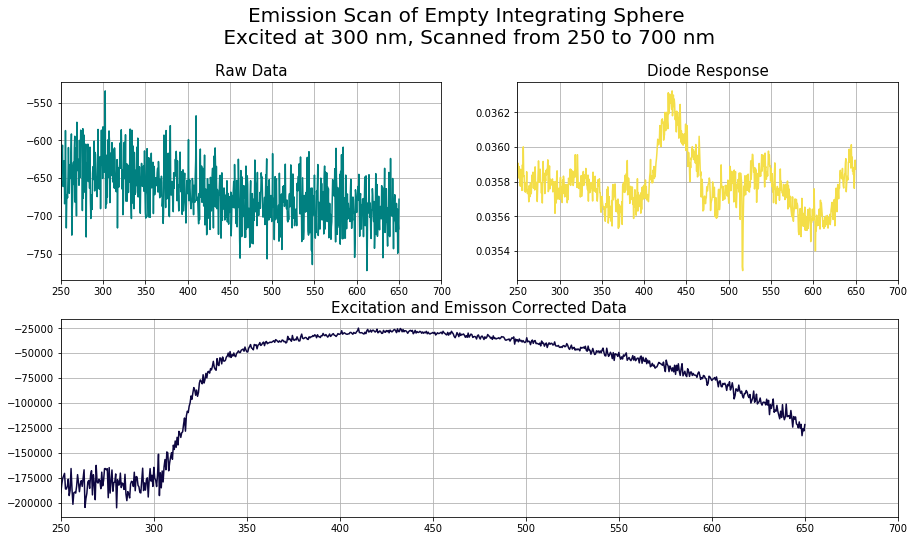

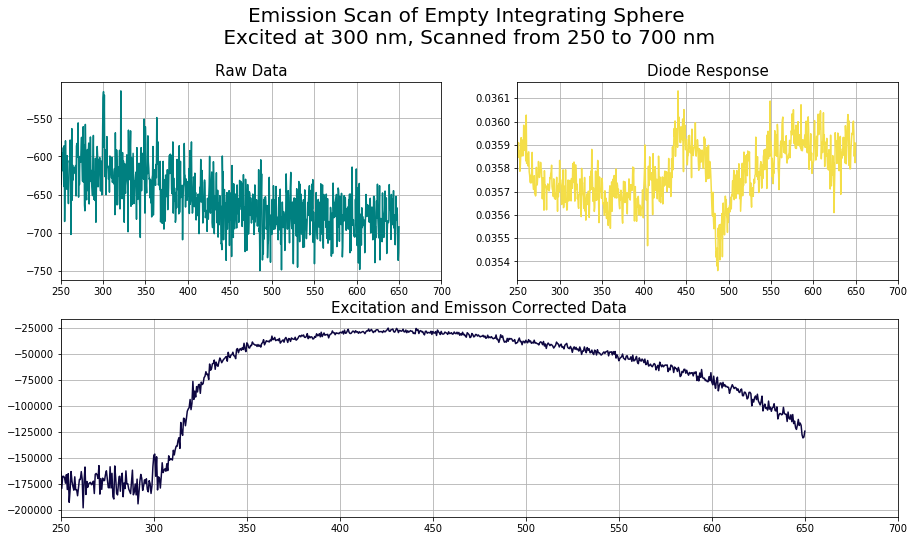

In [5]:
# dates = ["10 July 2017", "11 July 2017"]

for i in range(len(em_scans)):
    scan= em_scans[i]
    fig = plt.figure(figsize = (15,8))
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0), colspan = 2)

    ax1.plot(scan.wavelengths, scan.raw_data, color = "#008080")
    ax2.plot(scan.wavelengths, scan.diode, color = "#f4de48")
    ax3.plot(scan.wavelengths, scan.cor_data, color = "#0e0741")
    
    fig.suptitle("Emission Scan of Empty Integrating Sphere\n Excited at 300 nm, Scanned from 250 to 700 nm", 
                 fontsize = 20, y = 1.01)
    ax1.set_title("Raw Data", fontsize = 15)
    ax2.set_title("Diode Response", fontsize = 15)
    ax3.set_title("Excitation and Emisson Corrected Data", fontsize = 15)
    
    for ax in [ax1, ax2, ax3]:
        ax.grid()
        ax.set_xlim([250,700])
    
    plt.show()
    plt.close(fig)

## Recent Phenomenon?
### Looking at emission scans from 13 June 2017

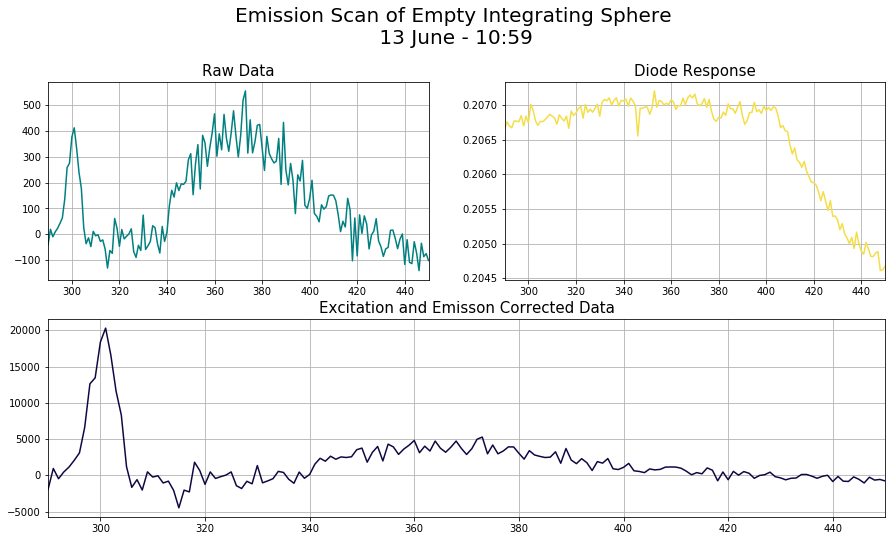

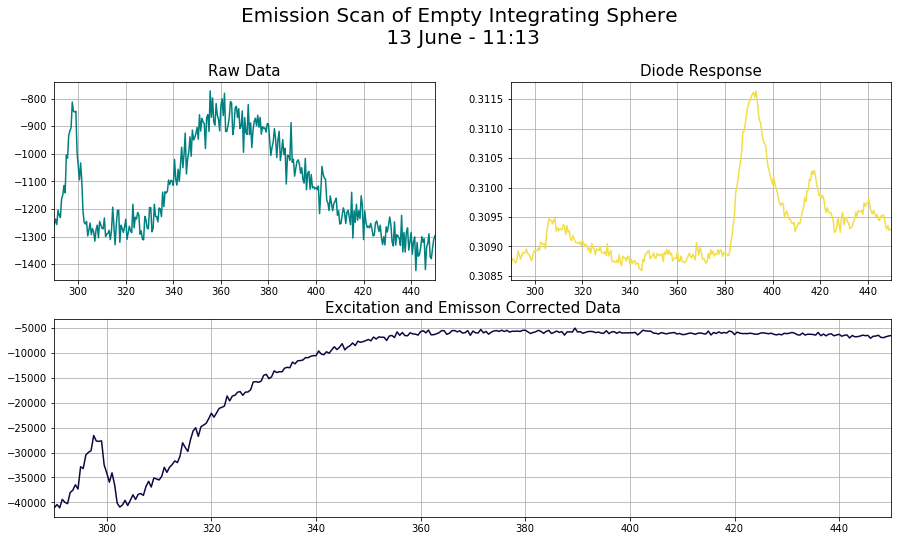

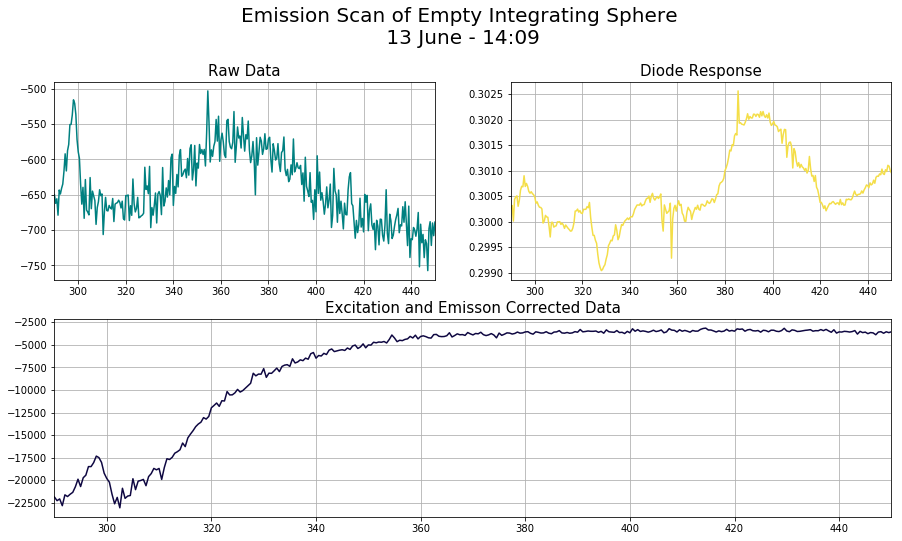

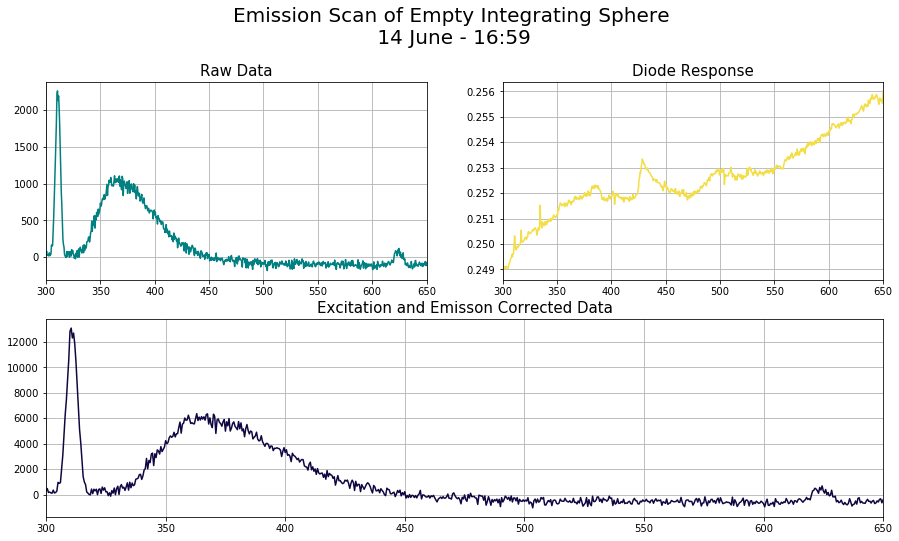

In [6]:
dates_times = ["13 June - 10:59",
               "13 June - 11:13",
               "13 June - 14:09",
               "14 June - 16:59"]

for i in range(len(jun_scans)):
    scan= jun_scans[i]
    fig = plt.figure(figsize = (15,8))
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0), colspan = 2)

    ax1.plot(scan.wavelengths, scan.raw_data, color = "#008080")
    ax2.plot(scan.wavelengths, scan.diode, color = "#f4de48")
    ax3.plot(scan.wavelengths, scan.cor_data, color = "#0e0741")
    
    fig.suptitle("Emission Scan of Empty Integrating Sphere\n %s" %dates_times[i], 
                 fontsize = 20, y = 1.01)
    ax1.set_title("Raw Data", fontsize = 15)
    ax2.set_title("Diode Response", fontsize = 15)
    ax3.set_title("Excitation and Emisson Corrected Data", fontsize = 15)
    
    for ax in [ax1, ax2, ax3]:
        ax.grid()
        ax.set_xlim(scan.em_range)
    
    plt.show()
    plt.close(fig)

## Sync Scan Results

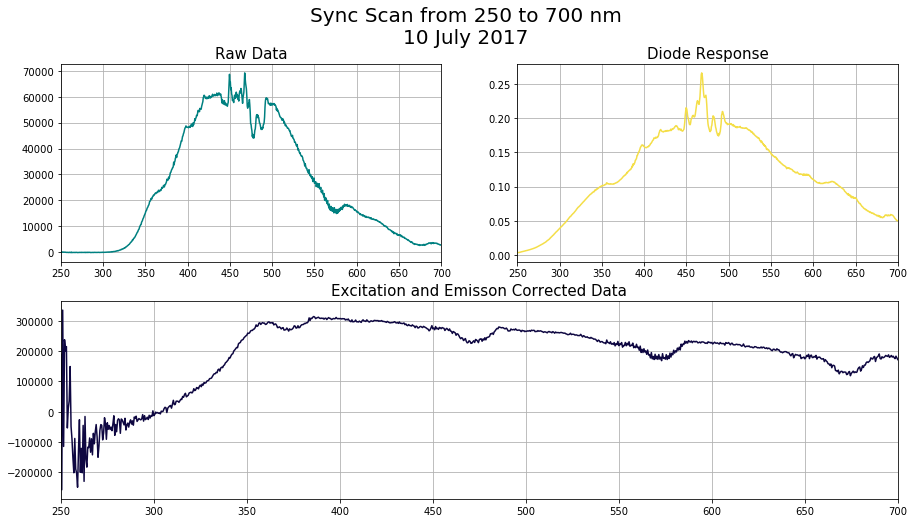

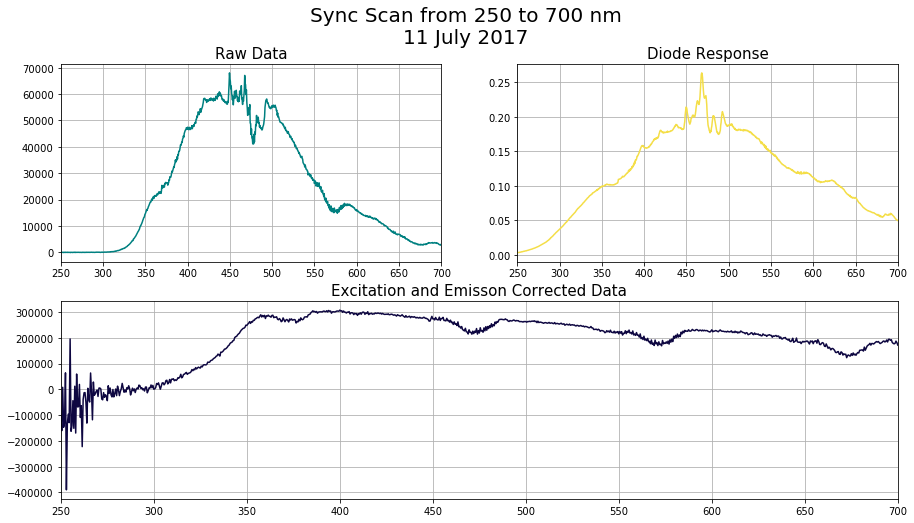

In [7]:
dates = ["10 July 2017", "11 July 2017"]

for i in range(len(sync_scans)):
    scan= sync_scans[i]
    fig = plt.figure(figsize = (15,8))
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0), colspan = 2)

    ax1.plot(scan.wavelengths, scan.raw_data, color = "#008080")
    ax2.plot(scan.wavelengths, scan.diode, color = "#f4de48")
    ax3.plot(scan.wavelengths, scan.cor_data, color = "#0e0741")
    
    fig.suptitle("Sync Scan from 250 to 700 nm\n%s" %dates[i], fontsize = 20)
    ax1.set_title("Raw Data", fontsize = 15)
    ax2.set_title("Diode Response", fontsize = 15)
    ax3.set_title("Excitation and Emisson Corrected Data", fontsize = 15)
    
    for ax in [ax1, ax2, ax3]:
        ax.grid()
        ax.set_xlim([250,700])
    
    plt.show()
    plt.close(fig)


In [33]:
Image(url= "http://www.obbcorp.com/images/KiloArc/xe.gif", width=2*431, height=2*292)

In [9]:
all_paths = list()
for root, dirs, files in os.walk("./"):
    for f in files:
        fullpath = os.path.join(root, f)
        if os.path.splitext(fullpath)[1] == '.txt':
            all_paths.append(fullpath)
            
lamp_change = time.mktime(time.strptime("July 7, 2016", "%B %d, %Y"))
            
time_stamps = list()
avg_diode = list()
ex_waves = list()
for path in all_paths:
    try:
        data = PTIData(path)
        if(len(data.ex_range)) == 1:
            if data.diode is not None:
                if time.mktime(data.acq_start) > lamp_change:
                    time_stamps.append(time.mktime(data.acq_start))
                    avg_diode.append(np.mean(data.diode))
                    ex_waves.append(data.ex_range[0])
    except KeyboardInterrupt:
        break
    except:
        plt.close('all')

ERROR!! Unknown file format.
ERROR!! Unknown file format.
ERROR!! Unknown file format.
ERROR!! Unknown file format.
ERROR!! Unknown file format.
ERROR!! Unknown file format.
ERROR!! Unknown file format.


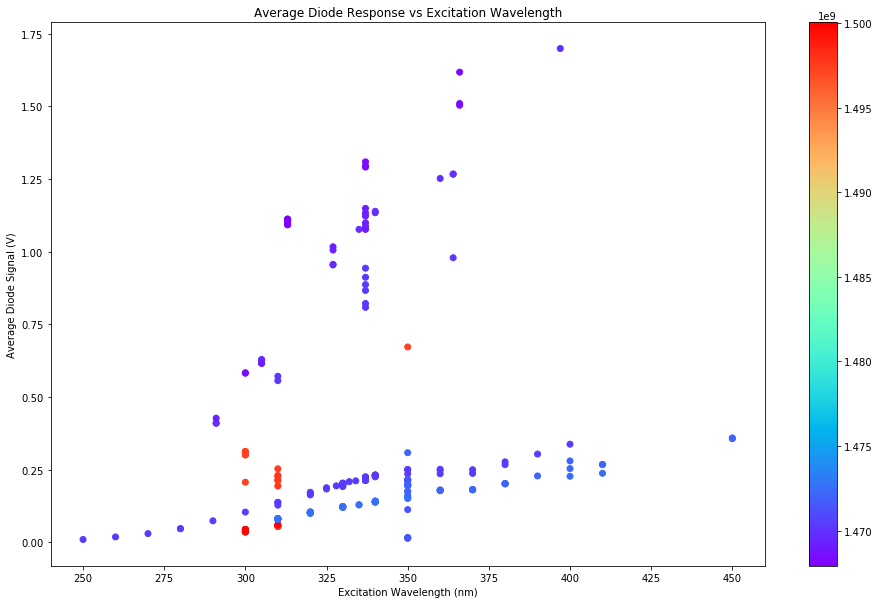

In [31]:
plt.figure(figsize = (16,10))
plt.scatter(x = ex_waves, y = avg_diode, c=time_stamps,cmap=plt.cm.rainbow)
plt.title("Average Diode Response vs Excitation Wavelength")
plt.ylabel("Average Diode Signal (V)")
plt.xlabel("Excitation Wavelength (nm)")
plt.colorbar()
plt.show()

## Box and Sphere Scans after System Restart

In [11]:
prefix = "Noah/PTI System Check/"
FS_fnames = [prefix+"EmScan_FS_empty_ex300_em250-600_2sec_20170712_1459.txt",
             prefix+"EmScan_FS_empty_ex300_em250-600_2sec_20170712_1623.txt"
            ]

IS_fnames = [prefix+"EmScan_IS_empty_ex300_em250-600_2sec_20170712_1644.txt",
             prefix+"EmScan_IS_empty_ex300_em250-600_2sec_20170712_1655.txt",
             prefix+"EmScan_IS_empty_ex300_em250-600_2sec_20170712_1709.txt"
            ]

FS_data = path_list_to_data_array(FS_fnames)
IS_data = path_list_to_data_array(IS_fnames)

In [12]:
'''Takes a PTIData instance and the excorr and emcorr LUTs as numpy arrays.
   Removes the diode, excitation LUT, and emission LUT corrections from the corrected data.
   Modifies the instances 'cor_data' member variable array.'''
from scipy.interpolate import interp1d

def load_excorr_file(PTIData_instance):
    excorr = np.genfromtxt('PTI/correction_data/excorr.txt',
                           skip_header = 6,
                           skip_footer = 1,
                           usecols = 1)
    
    step = PTIData_instance.step_size
    excorr_range = np.arange(250, 750+1)
    xvals = np.arange(250, 750 + step , step)
    excorr = interp1d(excorr_range, excorr,'cubic')(xvals)
    
    min_data_wavelength = PTIData_instance.wavelengths[0]
    max_data_wavelength = PTIData_instance.wavelengths[-1]
    
    needed_wavelengths = np.where((xvals >= min_data_wavelength) & 
                                  (xvals <= max_data_wavelength))
    
    excorr = excorr[needed_wavelengths]
    
    if min_data_wavelength < 250:
        extra_x = np.arange(min_data_wavelength, 250, step)
        left_interp = excorr[0]*np.ones(extra_x.size)
        excorr = np.append(left_interp, excorr)
    if max_data_wavelength > 750:
        extra_x = np.arange(750, max_data_wavelength, step)
        right_interp = excorr[-1]*np.ones(extra_x.size)
        excorr = np.append(excorr, right_interp)
    
    return excorr

def load_emcorr_file(PTIData_instance, in_FS = False):
    if in_FS:
        fname = 'PTI/correction_data/emcorri.txt'
        emcorr_min_wave = 250
        emcorr_max_wave = 850
    if not in_FS:
        fname = 'PTI/correction_data/emcorr-sphere-quanta.txt'
        emcorr_min_wave = 300
        emcorr_max_wave = 848
    
    emcorr = np.genfromtxt(fname,
                           skip_header = 6,
                           skip_footer = 1,
                           usecols = 1)
    
    
    step = PTIData_instance.step_size
    emcorr_range = np.arange(emcorr_min_wave, emcorr_max_wave+2,2)
    xvals = np.arange(emcorr_min_wave, emcorr_max_wave + step , step )
    
    emcorr = interp1d(emcorr_range, emcorr)(xvals)

    min_data_wavelength = PTIData_instance.wavelengths[0]
    max_data_wavelength = PTIData_instance.wavelengths[-1]
    
    needed_wavelengths = np.where((xvals >= min_data_wavelength) & 
                                  (xvals <= max_data_wavelength))
    
    emcorr = emcorr[needed_wavelengths]
    
    if min_data_wavelength < emcorr_min_wave:
        extra_x = np.arange(min_data_wavelength, emcorr_min_wave, step)
        left_interp = emcorr[0]*np.ones(extra_x.size)
        emcorr = np.append(left_interp, emcorr)
    if max_data_wavelength > emcorr_max_wave:
        extra_x = np.arange(emcorr_max_wave, max_data_wavelength, step)
        right_interp = emcorr[-1]*np.ones(extra_x.size)
        emcorr = np.append(emcorr, right_interp)
    
    return emcorr
    

def undo_felix_corrections(PTIData_instance, 
                           in_FS = False,
                           diode = True,
                           excorr = True,
                           emcorr = True):
    data = copy.deepcopy(PTIData_instance)
    
    # Undo the diode correction made from the ExCorr RCQC signal
    if diode:
        data.cor_data  *= PTIData_instance.diode
    
    # Undo the LUT corrections
    if excorr:
        data.cor_data  *= load_excorr_file(PTIData_instance)
    
    if emcorr:
        data.cor_data  /= load_emcorr_file(PTIData_instance, in_FS)
    
    return data

def get_felix_corrections(PTIData_instance, 
                           in_FS = False,
                           diode = True,
                           excorr = True,
                           emcorr = True):
    data = np.ones(PTIData_instance.cor_data.size)
    
    # Perform the diode correction made from the ExCorr RCQC signal
    if diode:
        data  /= PTIData_instance.diode
    
    # Perform the LUT corrections
    if excorr:
        data /= load_excorr_file(PTIData_instance)
    
    if emcorr:
        data *= load_emcorr_file(PTIData_instance, in_FS)
    
    return data
    

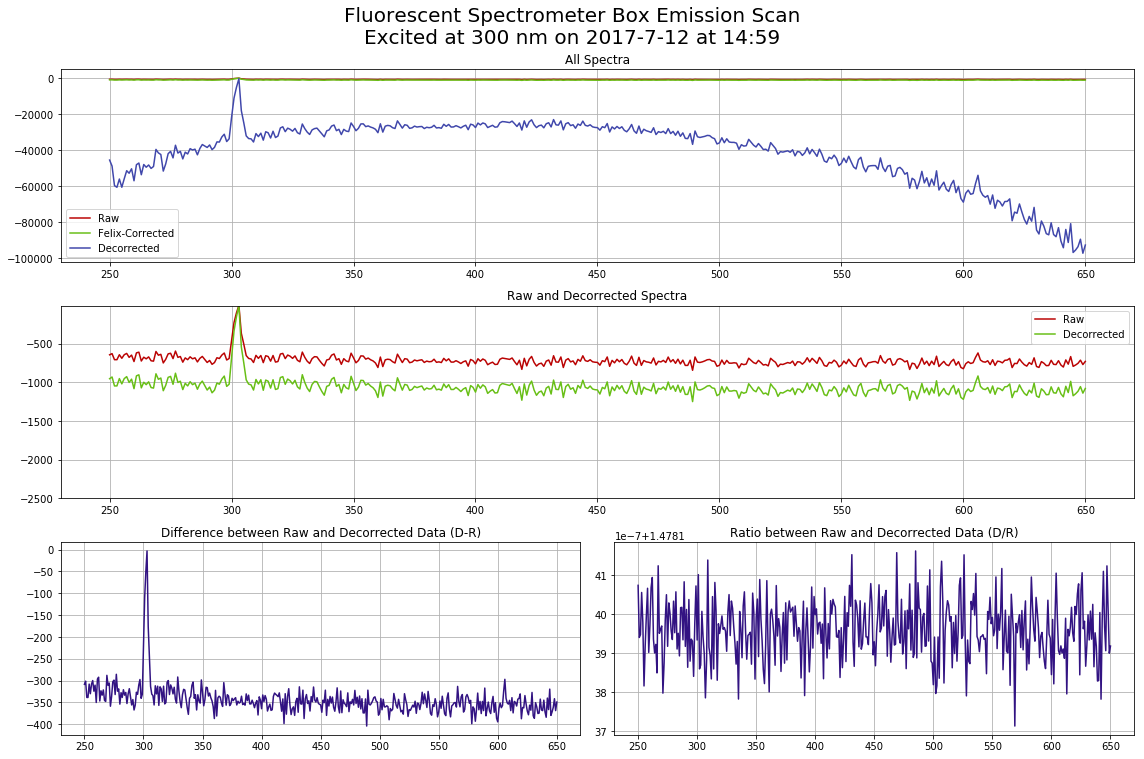

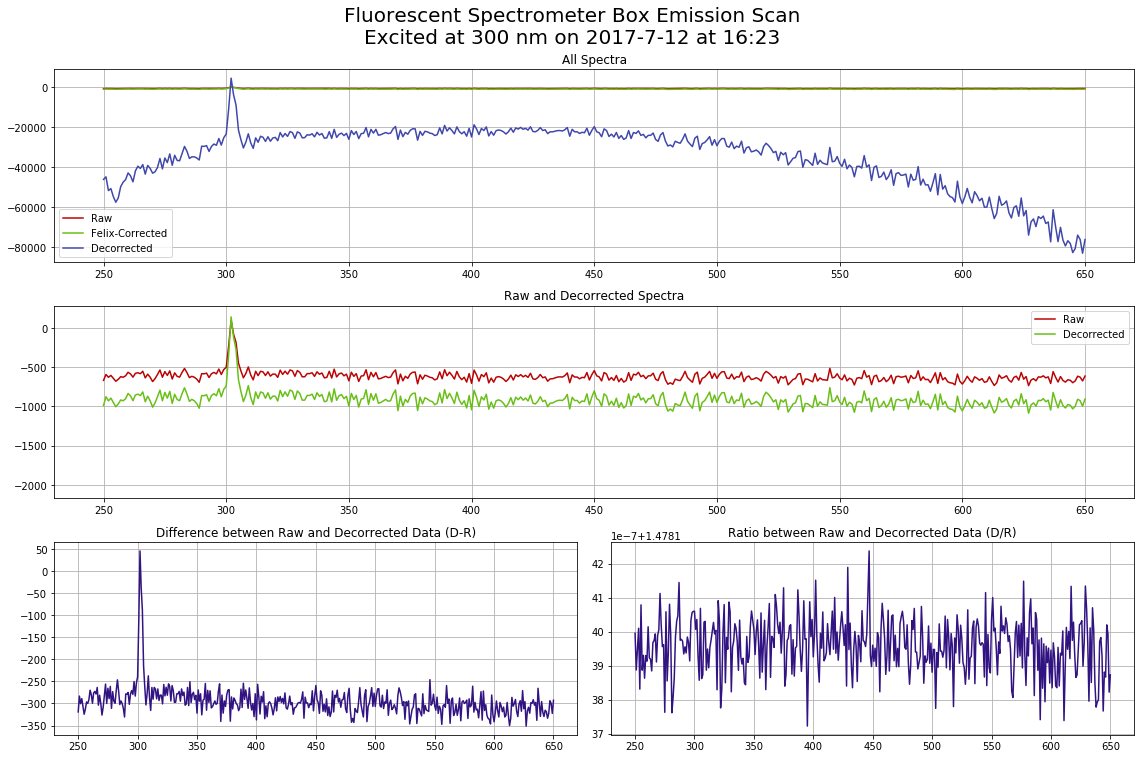

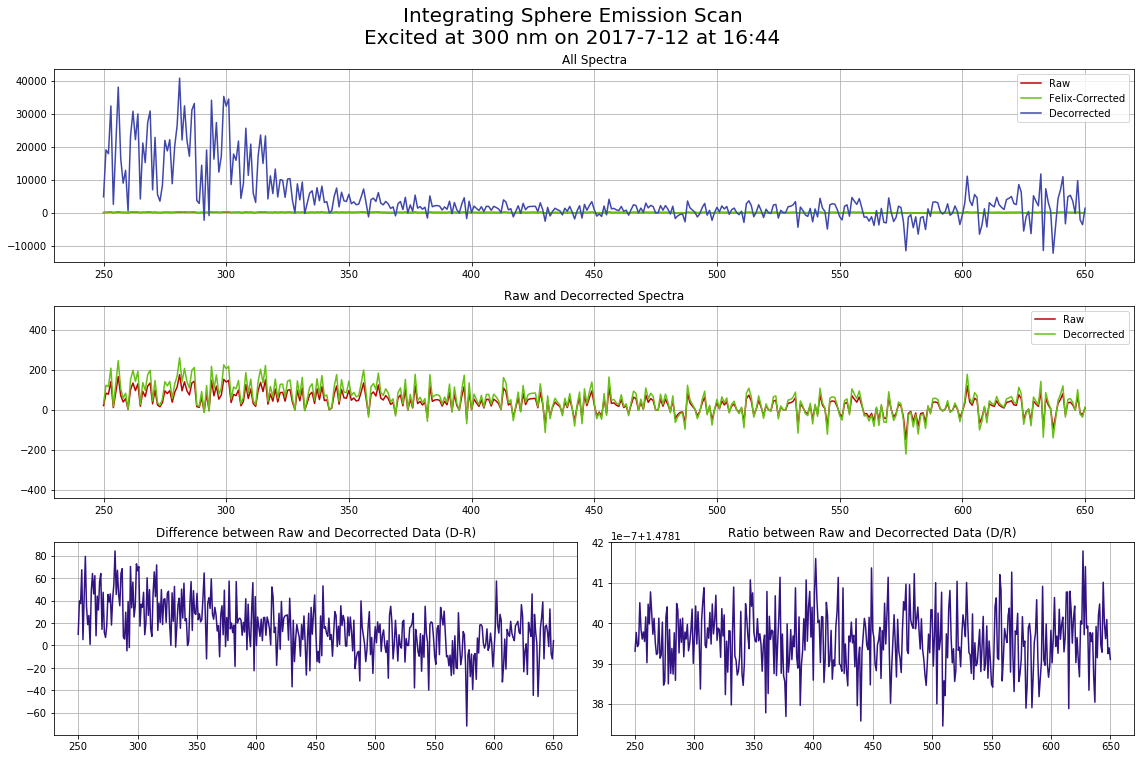

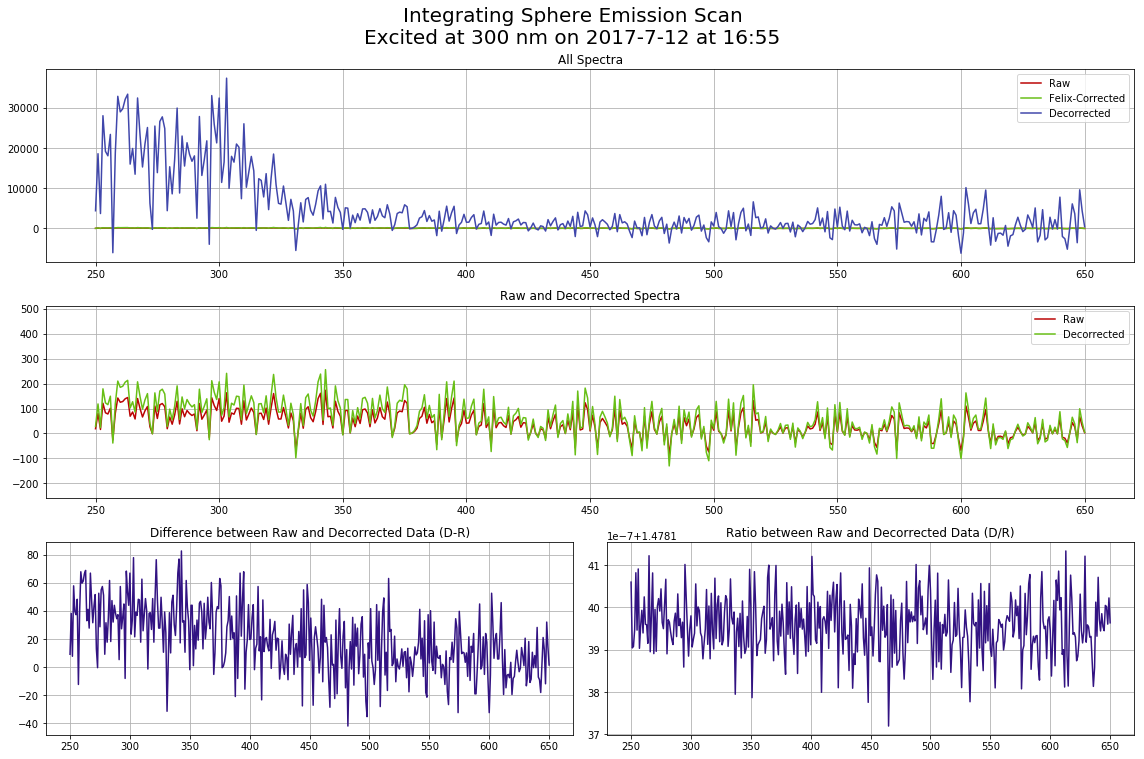

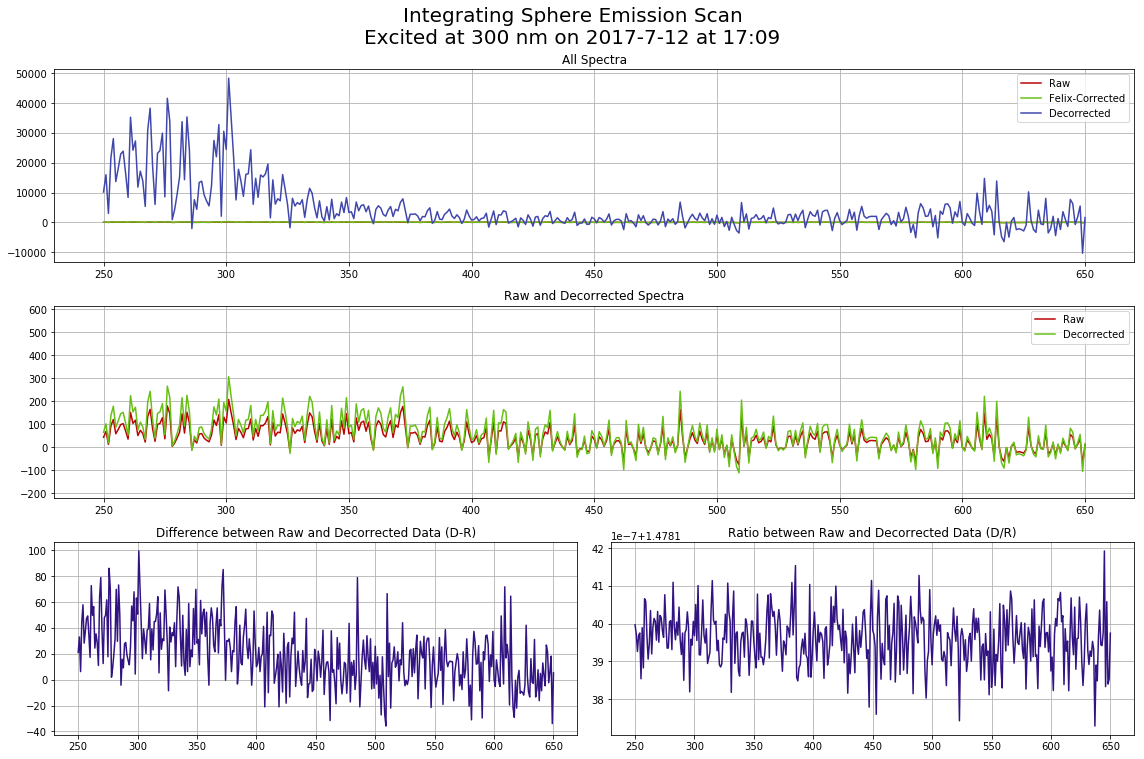

In [15]:
for data in FS_data + IS_data:
    in_FS = 'fs' in data.file_path.lower()
    decorr_data = undo_felix_corrections(data, in_FS,excorr=False)
    
    fig = plt.figure(figsize = (16,10))
    FS_IS = ["Integrating Sphere", "Fluorescent Spectrometer Box"]
    fig.suptitle("%s Emission Scan\nExcited at 300 nm on %s" %(FS_IS[in_FS], data.get_date(space = " at ")),
                 y = 1.05, fontsize = 20)
    
    ax1 = plt.subplot2grid((3,2), (0,0), colspan = 2)
    ax2 = plt.subplot2grid((3,2), (1,0), colspan = 2)
    ax3 = plt.subplot2grid((3,2), (2,0))
    ax4 = plt.subplot2grid((3,2), (2,1))
    
    for ax in [ax1,ax2]:
        ax.plot(data.wavelengths, data.raw_data, color = "#ba0303")
        ax.plot(data.wavelengths, decorr_data.cor_data, color = "#68bf16")
    
    ax1.plot(data.wavelengths, data.cor_data, color = "#4047ab")
    ax3.plot(data.wavelengths, decorr_data.cor_data - data.raw_data,"#321382")
    ax4.plot(data.wavelengths, decorr_data.cor_data / data.raw_data,"#321382")
 
    ax2_min_y = np.min(np.append(data.raw_data,decorr_data.cor_data)) * 2
    ax2_max_y = np.max(np.append(data.raw_data,decorr_data.cor_data)) * 2
    ax2.set_ylim([ax2_min_y, ax2_max_y])
    
    ax1.legend(["Raw", "Felix-Corrected", "Decorrected"])   
    
    ax2.legend(["Raw", "Decorrected"])
    
    ax1.set_title("All Spectra")
    ax2.set_title("Raw and Decorrected Spectra")
    ax3.set_title("Difference between Raw and Decorrected Data (D-R)")
    ax4.set_title("Ratio between Raw and Decorrected Data (D/R)")
    
    for ax in [ax1, ax2, ax3, ax4]:
        ax.grid()
    
    plt.tight_layout()
    plt.show()
    

    
    plt.close(fig)
    del decorr_data
    

## Cuvette of 'Pure EtOH' in Fluorescent Spectrometer (Box)

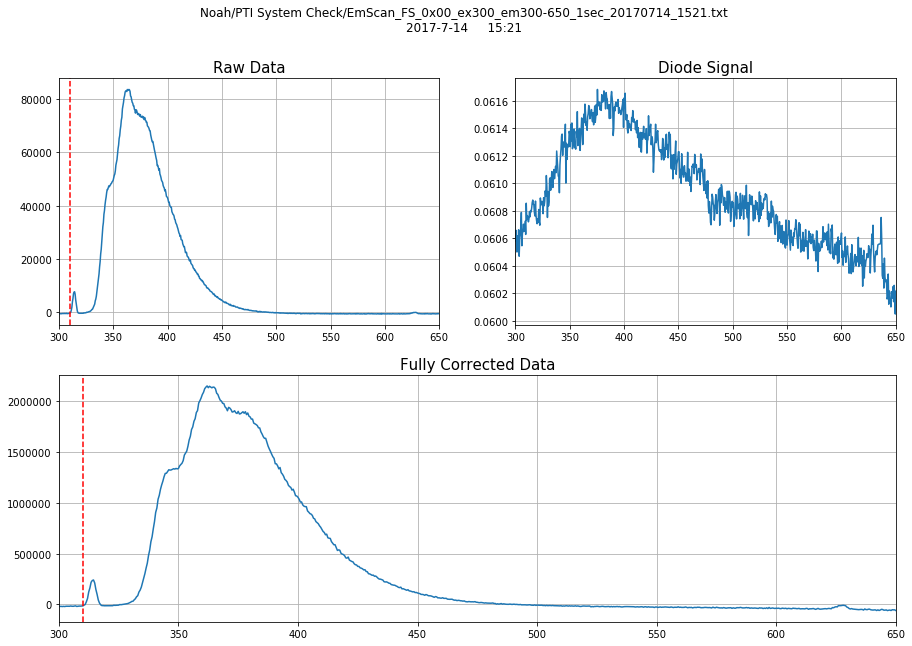

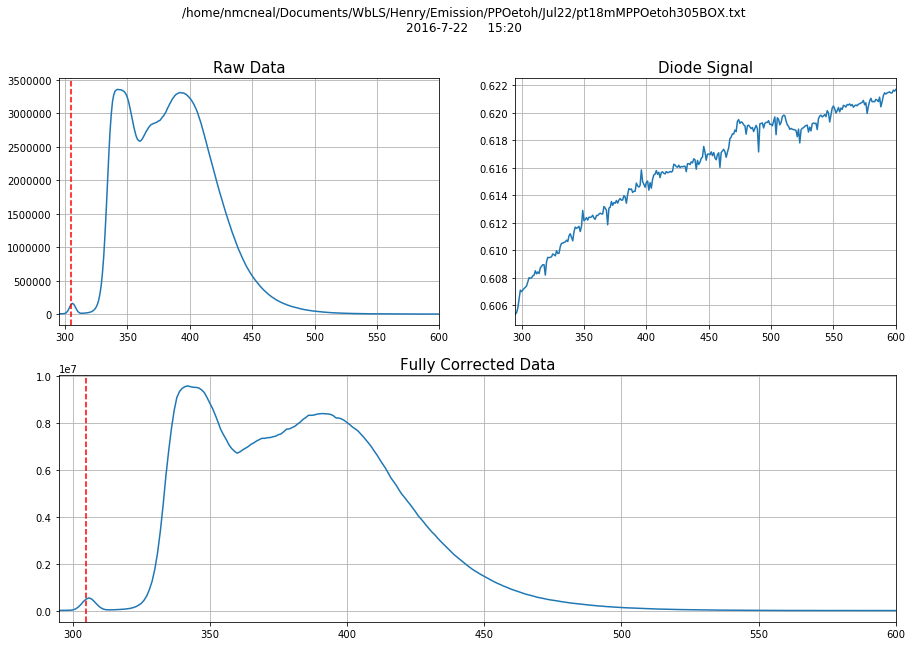

In [30]:
paths = ["Noah/PTI System Check/EmScan_FS_0x00_ex300_em300-650_1sec_20170714_1521.txt",
         "/home/nmcneal/Documents/WbLS/Henry/Emission/PPOetoh/Jul22/pt18mMPPOetoh305BOX.txt"]

for path in paths:
    data = PTIData(path)
    fig = data.plot()
    fig.set_figheight(10)
    fig.set_figwidth(15)
    fig.get_axes()[0].axvline(x = data.ex_range[0], color = 'r', ls = '--')
    fig.get_axes()[2].axvline(x = data.ex_range[0], color = 'r', ls = '--')
    plt.show()

![title](Noah/PTI System Check/chart.jpeg)